# **Classificação de Florestas**
Este trabalho tem como objetivo realizar melhorias para a submissão realizada no 1º semestre, prever o tipo de floresta com base em variáveis numéricas, utilizando algoritmos de aprendizagem supervisionada.

## **Objetivos**
Dos principais objectivos as melhorias foram:

2. Testar e avaliar diferentes algoritmos e estratégias de validação;
3. Identificar o(s) modelo(s) com melhor desempenho;
4. Submeter os modelos na plataforma Kaggle;
5. Realizar uma análise aprofundada dos resultados obtidos.


# **Melhorias do trabalho**

Normalização dos dados com escalonamento simples;

Acrescentado um conjunto de validação para avaliar o modelo.

Utilização recorrente da técnica de GridSearch;

Avaliação do desempenho com a média de erros absolutos;

Utilização da técnica BaggingClassifier;

Apresentação de todos os modelos submetidos e seus desempenhos publicos e privados;

train_test_split(stratify=data_train_y) argumento que garante que as classes estejam divididas em ambos os conjuntos: treino e teste;



# **Tratamento e Análise de dados**

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from datetime import datetime
start_time = datetime.now()


Após as importações realizadas ao longo da implementação, procedemos ao carregamento dos dados, à remoção e separação de colunas relevantes, como a variável **'id'** e a classe **'floresta'**, além de realizar uma verificação minuciosa dos dados.

In [5]:
### Carregamento de Dados
data = pd.read_csv('sample_data/train.csv') #
test_final = pd.read_csv('sample_data/test.csv')

### Remoção da Coluna 'id'
data = data.drop('id',axis=1) # 'id' é o nome da coluna no ficheiro csv

### Separação de Variáveis Descritivas da de Classe
data_train_X = data.drop('floresta',axis=1) # 'floresta' é o nome da coluna no ficheiro csv
data_train_y = data.floresta

### Separação da Coluna 'id' das Variáveis Descritivas
data_test_X = test_final.drop('id',axis=1)
data_test_id = test_final.id

### Verificação Inicial dos Dados
print("data_train_X.head")
print()
print(data_train_X.head())
print()
print()

print("target.head")
print()
print(data_train_y.head())
print()
print()

print("data.head()")
print()
print(data.head())
print()
print()

print("data_test_X.head")
print()
print(data_test_X.head())
print()
print()

print("data_test_id.head")
print()
print(data_test_id.head())
print()
print()


data_train_X.head

   elevacao  aspeto  inclinacao  dh_agua  dv_agua  dh_estrada  sombra_9  \
0      2596      51           3      258        0         510       221   
1      2785     155          18      242      118        3090       238   
2      2579     132           6      300      -15          67       230   
3      2606      45           7      270        5         633       222   
4      2605      49           4      234        7         573       222   

   sombra_12  sombra_15  dh_Incendio  area  solo  
0        232        148         6279     4     5  
1        238        122         6211     4     5  
2        237        140         6031     4     5  
3        225        138         6256     4     5  
4        230        144         6228     4     5  


target.head

0    6
1    3
2    3
3    6
4    6
Name: floresta, dtype: int64


data.head()

   elevacao  aspeto  inclinacao  dh_agua  dv_agua  dh_estrada  sombra_9  \
0      2596      51           3      258        0      

Info:

<bound method DataFrame.info of        elevacao  aspeto  inclinacao  dh_agua  dv_agua  dh_estrada  sombra_9  \
0          2596      51           3      258        0         510       221   
1          2785     155          18      242      118        3090       238   
2          2579     132           6      300      -15          67       230   
3          2606      45           7      270        5         633       222   
4          2605      49           4      234        7         573       222   
...         ...     ...         ...      ...      ...         ...       ...   
10615      2617      45           9      240       56         666       223   
10616      2503     157           4       67        4         674       224   
10617      2610     259           1      120       -1         607       216   
10618      2570     346           2        0        0         331       215   
10619      2533      71           9      150       -3         577       230   

       sombr

/tmp/ipython-input-6-2301825852.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='floresta', data=data, palette='viridis')


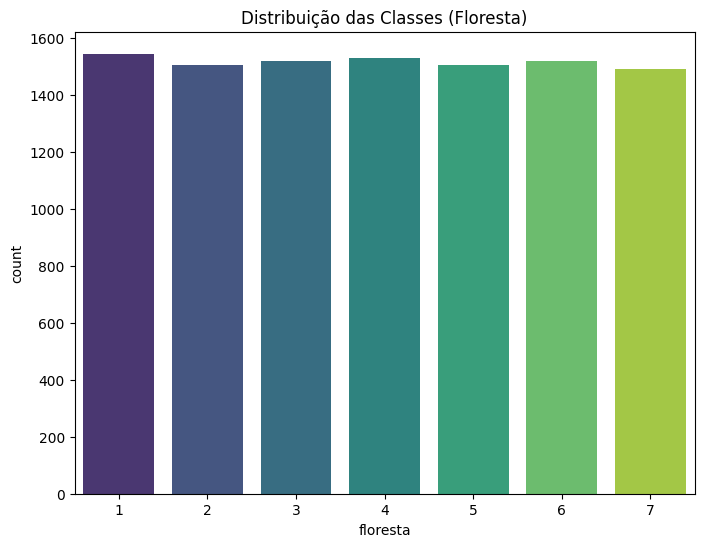

In [6]:
### Informações Gerais e Estatísticas Descritivas
print("Info:\n")
print(data.info)
print()
print()

print("Descrição:\n")
print(data.describe())
print()
print()

print("Valores nulos:\n")
print(data.isnull().sum())
print()
print()

### Visualização da Distribuição das Etiquetas da Classe 'floresta'
plt.figure(figsize = (8, 6))
sns.countplot(x='floresta', data=data, palette='viridis')
plt.title("Distribuição das Classes (Floresta)")
plt.show()
print()


## Normalização dos dados

* Escalonamento Simples (Simple Feature Scaling): esta tecnica consiste em dividir cada valor pelo valor máximo da coluna:


In [7]:
# Estes atributos, por serem categoricos são excluidos do escalonamento ['area','solo']

features = ['elevacao', 'aspeto', 'inclinacao', 'dh_agua', 'dv_agua', 'dh_estrada',
            'sombra_9', 'sombra_12', 'sombra_15', 'dh_Incendio']
for feature in features:
    data_train_X[feature] = data_train_X[feature] / data_train_X[feature].max()
    data_test_X[feature] = data_test_X[feature] / data_test_X[feature].max()

print(data_train_X.head())
print()
print(data_test_X.head())
print()


   elevacao    aspeto  inclinacao   dh_agua   dv_agua  dh_estrada  sombra_9  \
0  0.674461  0.141667    0.057692  0.192107  0.000000    0.074020  0.870079   
1  0.723565  0.430556    0.346154  0.180194  0.212996    0.448476  0.937008   
2  0.670044  0.366667    0.115385  0.223380 -0.027076    0.009724  0.905512   
3  0.677059  0.125000    0.134615  0.201042  0.009025    0.091872  0.874016   
4  0.676799  0.136111    0.076923  0.174237  0.012635    0.083164  0.874016   

   sombra_12  sombra_15  dh_Incendio  area  solo  
0   0.913386   0.599190     0.916241     4     5  
1   0.937008   0.493927     0.906318     4     5  
2   0.933071   0.566802     0.880053     4     5  
3   0.885827   0.558704     0.912885     4     5  
4   0.905512   0.582996     0.908799     4     5  

   elevacao    aspeto  inclinacao   dh_agua   dv_agua  dh_estrada  sombra_9  \
0  0.702260  0.919220        0.54  0.023184  0.042184    0.464233  0.574803   
1  0.655755  0.261838        0.14  0.163833 -0.009926    0.1

## Metodo de avaliação de desempenho Divisão Treino-Teste

In [8]:
### train_size, test_size e random_state val's
train_size_val = 0.75
valid_size_val = 0.25
random_state_val = 1364


In [9]:
### Divisão dos Dados em Treino e Teste

print()
print("train_size_val ->", train_size_val)
print("valid_size_val -> ", valid_size_val)
print("random_state_val -> ", random_state_val)

res = train_test_split(data_train_X, data_train_y,
                       train_size= train_size_val,
                       test_size=valid_size_val,
                       random_state=random_state_val, stratify=data_train_y)
X_train, X_valid, y_train, y_valid = res


train_size_val -> 0.75
valid_size_val ->  0.25
random_state_val ->  1364


Após concluirmos o tratamento dos dados e realizarmos uma análise com mínimo de detalhe para compreender o tipo de dados que estavamos a lidar, as nossas primeiras abordagens foram explorar algoritmos previamente estudados no âmbito da disciplina, testando-os com o conjunto de dados em análise.

# Experiências para melhores modelos

* **selecionar os valores para os melhores parâmetros do modelo**

* **Pesquisar o valor dos parametros para o melhor modelo com GridSearch**

* **submeter parâmetros obtidos**

* **Filtrar valores para os parâmetros**

* **selecionar valor de cada um dos parâmetros com menor erro absoluto médio**

* **submeter com melhores parâmetros**

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error


tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
tree_model.predict(X_valid)

print(tree_model.score(X_train, y_train))
print(tree_model.score(X_valid, y_valid))

val_mean_error = mean_absolute_error(tree_model.predict(X_valid), y_valid)
print(val_mean_error)

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(data_train_X, data_train_y)
tree_model.predict(data_test_X)

print(tree_model.score(data_train_X, data_train_y))

# convert to file submision.csv


1.0
0.7574387947269303
0.47570621468926555
1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

### Validação Cruzada

tree_model = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(tree_model, data_train_X, data_train_y, cv=5) # 5-fold cross-validation
print(scores)

[0.73116761 0.7212806  0.7113936  0.76082863 0.75329567]


### Grid Search para melhores atributos

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

# Grid_Search and Cross validation

# Define the parameter grid
param_grid = {
    'random_state': [1, 12, 1364],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10],
    'splitter': ['best'],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [900,910,890]
    }

# Create the grid search object
tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 900, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 1364, 'splitter': 'best'}
0.7329566854990583
DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       max_leaf_nodes=900, min_samples_split=5,
                       random_state=1364)


### Implementação com Cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeClassifier(random_state=1364,max_leaf_nodes= 890)
scores = cross_val_score(tree_model, X_train, y_train, cv=5) # 5-fold cross-validation
print(scores)
print(scores.mean())

print()
tree_model.fit(X_train, y_train)
tree_model.predict(X_valid)

print(tree_model.score(X_train, y_train))
print(tree_model.score(X_valid, y_valid))

val_mean_error = mean_absolute_error(tree_model.predict(X_valid), y_valid)
print(val_mean_error)

[0.76710609 0.74952919 0.74450722 0.76773384 0.75768989]
0.7573132454488387

0.9658505963590709
0.7548022598870057
0.4806026365348399


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeClassifier(random_state=1364, criterion='gini', max_depth= None, max_features= 'sqrt', max_leaf_nodes= 880, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
tree_model.fit(X_train, y_train)
tree_model.predict(X_valid)

print(tree_model.score(X_train, y_train))
print(tree_model.score(X_valid, y_valid))

val_mean_error = mean_absolute_error(tree_model.predict(X_valid), y_valid)
print(f'\n{val_mean_error}')


0.9256748273697426
0.7412429378531074

0.5220338983050847


### Apurar melhor valor para número máximo de nós folha da arvore (max_leaf_nodes) pelo erro médio absoluto

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1364)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

def get_best_max_leaf_nodes(max_leaf_nodes, X_train, X_valid, y_train, y_valid):
  my_mae={max_leaf_nodes: get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid) for max_leaf_nodes in max_leaf_nodes}
  print(my_mae)

  return min(my_mae, key=my_mae.get)

max_leaf_nodes= [500,800,870,880,890,900,910,920,980,990,1000]
best_max_leaf_nodes = get_best_max_leaf_nodes(max_leaf_nodes, X_train, X_valid, y_train, y_valid)
print(f"\nMelhor valor para max_leaf_nodes: {best_max_leaf_nodes}")

{500: 0.4768361581920904, 800: 0.47796610169491527, 870: 0.4806026365348399, 880: 0.4817325800376648, 890: 0.4806026365348399, 900: 0.47909604519774013, 910: 0.47909604519774013, 920: 0.47909604519774013, 980: 0.4768361581920904, 990: 0.48135593220338985, 1000: 0.47947269303201506}

Melhor valor para max_leaf_nodes: 500


In [ ]:
from sklearn.metrics import mean_absolute_error

tree_model = DecisionTreeClassifier(random_state=1364,max_leaf_nodes= 890)
tree_model.fit(data_train_X, data_train_y)
y_pred = tree_model.predict(data_test_X)

print(tree_model.score(data_train_X, data_train_y))

val_mean_error = mean_absolute_error(tree_model.predict(X_valid), y_valid)
print(val_mean_error)

0.9475517890772128
0.10056497175141244


Com objectivo de gerar o modelo para submissão, temos abaixo, o código:

In [ ]:
tree_model.fit(data_train_X, data_train_y)
y_pred = tree_model.predict(data_test_X)

print("Exatidão do conjunto de treino")
print(f"{tree_model.score(data_train_X, data_train_y)}\n")

print("id", "floresta")
for i in range(10):
  print(data_test_id[i], y_pred[i])

submission = pd.DataFrame({
  "id" : data_test_id,
  "Floresta": y_pred
  })

submission.to_csv("submission.csv", index=False)
print("\nGerado Arquivo submission")

# O modelo
print()
print(tree_model)
print()
print()
end_time = datetime.now()
print('Tempo para correr esta experiência : {}'.format(end_time - start_time))



Exatidão do conjunto de treino
0.9475517890772128

id floresta
10621 2
10622 6
10623 6
10624 6
10625 6
10626 3
10627 3
10628 3
10629 3
10630 2

Gerado Arquivo submission

DecisionTreeClassifier(max_leaf_nodes=890, random_state=1364)


Tempo para correr esta experiência : 0:00:58.616632


## ExtraTreeClassifier

Implementação do GridSearch para encontrar o melhor random_state no intervalo de 1 a 1000 com dois tipos de avaliação: accuracy e neg_mean_absolute_error.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier

param_grid = {
    'random_state': [i for i in range(1,1000)]
}

extra_tree_model = ExtraTreeClassifier()
grid_search = GridSearchCV(estimator=extra_tree_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'random_state': 126}
0.7196484620213435
ExtraTreeClassifier(random_state=126)


In [14]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import mean_absolute_error

extra_tree_model = ExtraTreeClassifier(random_state=126)
extra_tree_model.fit(X_train, y_train)
y_prediction = extra_tree_model.predict(X_valid)

print(extra_tree_model.score(X_train, y_train))
print(extra_tree_model.score(X_valid, y_valid))

print()
print(mean_absolute_error(y_prediction, y_valid))


1.0
0.7141242937853107

0.56045197740113


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier

param_grid = {
    'random_state': [i for i in range(1,1000)]
}

extra_tree_model = ExtraTreeClassifier()
grid_search = GridSearchCV(estimator=extra_tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


{'random_state': 503}
-0.5605775266792217
ExtraTreeClassifier(random_state=503)


In [15]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import mean_absolute_error


extra_tree_model = ExtraTreeClassifier(random_state=503)
extra_tree_model.fit(X_train, y_train)
y_prediction = extra_tree_model.predict(X_valid)

print(extra_tree_model.score(X_train, y_train))
print(extra_tree_model.score(X_valid, y_valid))

val_mean_error = mean_absolute_error(y_prediction, y_valid)
print()
print(val_mean_error)

1.0
0.6945386064030132

0.5992467043314501


Implementação do GridSearch com outros parâmetros do algoritmo ExtraTreeClassifier com avaliação 'neg_mean_absolute_error'

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier

param_grid = {
    'random_state': [126],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': [None],
    'max_leaf_nodes': [314,1886]
    }


extra_tree_model = ExtraTreeClassifier()
grid_search = GridSearchCV(estimator=extra_tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
grid_search.predict(X_valid)

print(grid_search.score(X_train, y_train))
print(grid_search.score(X_valid, y_valid))

{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 314, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 126, 'splitter': 'best'}
-0.4718141870684243
ExtraTreeClassifier(max_features=None, max_leaf_nodes=314, random_state=126,
                    splitter='best')
-0.24846202134337728
-0.47570621468926555


In [16]:
from sklearn.tree import ExtraTreeClassifier
extra_tree_model = ExtraTreeClassifier(max_features=None, max_leaf_nodes=314, random_state=126,
                    splitter='best')
extra_tree_model.fit(X_train, y_train)
extra_tree_model.predict(X_valid)

print(extra_tree_model.score(X_train, y_train))
print(extra_tree_model.score(X_valid, y_valid))

0.8725674827369743
0.7578154425612053


### Apurar melhor valor para número máximo de nós folha da arvore (max_leaf_nodes) e profundidade máxima da arvore (max_depth) pelo menor erro médio absoluto

Número máximo de nós folha da arvore (max_leaf_nodes)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import ExtraTreeClassifier

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = ExtraTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=126)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

def get_best(max_leaf_nodes, X_train, X_valid, y_train, y_valid):
  my_mae={max_leaf_nodes: get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid) for max_leaf_nodes in max_leaf_nodes}
  print(my_mae)

  return min(my_mae, key=my_mae.get)

max_leaf_nodes= [314,[i for i in range(990, 1990)]]
best = get_best(max_leaf_nodes, X_train, X_valid, y_train, y_valid)
print(f"\nMelhor valor para max_leaf_nodes: {best}")

{990: 0.6557438794726931, 991: 0.6557438794726931, 992: 0.655367231638418, 993: 0.6538606403013183, 994: 0.6538606403013183, 995: 0.6542372881355932, 996: 0.6538606403013183, 997: 0.6531073446327683, 998: 0.6527306967984934, 999: 0.6527306967984934, 1000: 0.6531073446327683, 1001: 0.6531073446327683, 1002: 0.6531073446327683, 1003: 0.6531073446327683, 1004: 0.6531073446327683, 1005: 0.6531073446327683, 1006: 0.6531073446327683, 1007: 0.655367231638418, 1008: 0.655367231638418, 1009: 0.656497175141243, 1010: 0.656497175141243, 1011: 0.655367231638418, 1012: 0.6557438794726931, 1013: 0.6557438794726931, 1014: 0.6557438794726931, 1015: 0.6557438794726931, 1016: 0.655367231638418, 1017: 0.655367231638418, 1018: 0.6549905838041431, 1019: 0.6549905838041431, 1020: 0.6549905838041431, 1021: 0.655367231638418, 1022: 0.6549905838041431, 1023: 0.6549905838041431, 1024: 0.6542372881355932, 1025: 0.6542372881355932, 1026: 0.6531073446327683, 1027: 0.6531073446327683, 1028: 0.6531073446327683, 1029

Profundidade máxima da arvore (max_depth)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import ExtraTreeClassifier

def get_mae(max_depth, train_X, val_X, train_y, val_y):
    model = ExtraTreeClassifier(max_depth=max_depth, random_state=126)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

def get_best(max_depth, X_train, X_valid, y_train, y_valid):
  my_mae={max_depth: get_mae(max_depth, X_train, X_valid, y_train, y_valid) for max_depth in max_depth}
  print(my_mae)

  return min(my_mae, key=my_mae.get)

max_depth= [i for i in range(1,500)]
best = get_best(max_depth, X_train, X_valid, y_train, y_valid)
print(f"\nMelhor valor para max_depth: {best}")

{1: 2.047080979284369, 2: 1.656497175141243, 3: 1.1781544256120526, 4: 1.343502824858757, 5: 1.551412429378531, 6: 1.3148775894538607, 7: 1.3258003766478343, 8: 1.2056497175141243, 9: 0.8753295668549906, 10: 0.8595103578154426, 11: 0.784557438794727, 12: 0.6689265536723163, 13: 0.7653483992467043, 14: 0.6674199623352166, 15: 0.7548022598870057, 16: 0.6836158192090396, 17: 0.6617702448210923, 18: 0.5845574387947269, 19: 0.6120527306967984, 20: 0.6135593220338983, 21: 0.5747645951035781, 22: 0.5495291902071563, 23: 0.5713747645951036, 24: 0.5713747645951036, 25: 0.5480225988700564, 26: 0.5389830508474577, 27: 0.5514124293785311, 28: 0.5887005649717514, 29: 0.5728813559322034, 30: 0.5698681732580038, 31: 0.6003766478342749, 32: 0.6003766478342749, 33: 0.6003766478342749, 34: 0.6003766478342749, 35: 0.6003766478342749, 36: 0.6003766478342749, 37: 0.6003766478342749, 38: 0.6003766478342749, 39: 0.6003766478342749, 40: 0.6003766478342749, 41: 0.6003766478342749, 42: 0.6003766478342749, 43: 0

### BaggingClassifier aplicada a ExtraTreeClassifier

Tecnica aplicada para classificar varios modelos base cada um em subconjuntos aleatórios do conjunto de dados original e, em seguida, agregar suas previsões individuais (por votação ou por média) para formar uma previsão final.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree_model = BaggingClassifier(ExtraTreeClassifier(random_state=1364)
, random_state=1364)
extra_tree_model.fit(X_train, y_train)
print(extra_tree_model.score(X_train, y_train))
print(extra_tree_model.score(X_valid, y_valid))

0.9944758317639674
0.8033898305084746


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree_model = BaggingClassifier(ExtraTreeClassifier(random_state=126)
, random_state=126)
extra_tree_model.fit(X_train, y_train)
print(extra_tree_model.score(X_train, y_train))
print(extra_tree_model.score(X_valid, y_valid))

0.9939736346516007
0.791713747645951


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree_model = BaggingClassifier(ExtraTreeClassifier(random_state=503)
, random_state=503)
extra_tree_model.fit(X_train, y_train)
print(extra_tree_model.score(X_train, y_train))
print(extra_tree_model.score(X_valid, y_valid))

0.9939736346516007
0.791713747645951


In [17]:
extra_tree_model.fit(data_train_X, data_train_y)
y_pred = extra_tree_model.predict(data_test_X)

print(f"{extra_tree_model.score(data_train_X, data_train_y)}\n")

print("id", "floresta")
for i in range(5):
  print(data_test_id[i], y_pred[i])

submission = pd.DataFrame({
  "id" : data_test_id,
  "Floresta": y_pred
  })

submission.to_csv("submission.csv", index=False)
print("\nGerado Arquivo submission")

# O modelo
print()
print(extra_tree_model)
print()
print()
end_time = datetime.now()
print('Tempo para correr esta experiência : {}'.format(end_time - start_time))



0.8516949152542372

id floresta
10621 2
10622 6
10623 6
10624 6
10625 6

Gerado Arquivo submission

ExtraTreeClassifier(max_features=None, max_leaf_nodes=314, random_state=126,
                    splitter='best')


Tempo para correr esta experiência : 0:08:55.883833


## Algoritmos e Parâmetros testados

DecisionTreeClassifier

1.   com GridSearch

  *   'random_state'
  *   'criterion'
  *   'max_depth'
  *   'min_samples_split'
  *   'splitter'
  *   'min_samples_leaf'
  *   'max_features'
  *   'max_leaf_nodes'

2.   com média de erros absolutos

  *   'max_leaf_nodes'

ExtraTreeClassifier

1.  com GridSearch

    *    'random_state'
    *    'criterion'
    *    'splitter'
    *    'max_depth'
    *    'min_samples_split'
    *    'min_samples_leaf'
    *    'max_features'
    *    'max_leaf_nodes'

2.  com média de erros abosultos

    *    'max_leaf_nodes'
    *    'max_depth'

## Estratégia de Avaliação



Nomea-se as estratégias utilizadas:


1.   GridSearch e Cross Validation
2.   BaggingClassifier
3.   mean_absolute_error- media de erros abosolutos
4.   Accuracy- media de exatidão



# Escolha dos modelos submetidos na plataforma kaggle

## Subconjunto dos modelos criados

**DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=1)**

O subconjunto para GridSearch da DecisionTreeClassifier:

  * 'random_state': [1, 12, 123, 246, 692, 1364],
  *  'criterion': ['gini', 'entropy'],
  *  'max_depth': [None, 10, 20, 30],
  *  'min_samples_split': [2, 5, 10],
  *  'splitter': ['best', 'random'],
  *  'min_samples_leaf': [1, 2, 4],
  *  'max_features': ['sqrt', 'log2'],
  *  'max_leaf_nodes': [None,5,50,250,500,5000]

Gerou o melhor modelo:

**DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=1, max_leaf_nodes= 5000)**

Realizei uma nova experiência com novos valores para:
  *  'max_leaf_nodes': [500,1000,2500,5000]

Desta vez, max_leaf_nodes=1000 representa o melhor modelo.

**DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=1, max_leaf_nodes=1000)**


Sabendo que o parametro 'max_leaf_nodes' é de grande relevância no algoritmo DecisionTreeClassifier testei, unica e exclusivamente, os valores do conjunto:
  
  *  max_leaf_nodes in [500,800,870,880,890,900,910,920,980,990,1000]

Os valores foram avaliados com base na media de erros abosolutos com a menor media para 890 arvores, gerando desta forma o melhor modelo para o algoritmo em questao:

**DecisionTreeClassifier(max_leaf_nodes=890, random_state=1364)**

ExtraTreeClassifier

Inicialmente o subconjunto para GridSearch de ExtraTreeClassifier:
*   'random_state': [i for i in range(1,1000)]
Com os tipos de avaliação:
  1.    'accuracy'- random_state=126
  2.    'neg_mean_absolute_error'- random_state=503

Em passos seguintes a adicão uma a uma dos subconjuntos:
*   'random_state': [126,503],
*    'criterion': ['gini', 'entropy', 'log_loss'],
*    'splitter': ['best', 'random'],
*    'max_depth': [None,[i for i in range(1,500)]]- None,
*    'min_samples_split': [i for i in range(1,1000)]- 2,
*    'min_samples_leaf': [i for i in range(1,1000)]- 1,
*    'max_features': [None, [i for i in range(1,1000)]]- None,
*    'max_leaf_nodes': [i for i in range(2, 1000)]- 314

Após esta experiência resultou no modelo:

**ExtraTreeClassifier(max_features=None, max_leaf_nodes=314, random_state=126, splitter='best')**



# Caracteristicas dos dois Melhores modelos em publico

DecisionTreeClassifier(max_leaf_nodes=890, random_state=1364)
  * Score: 0.78177
  * Public score: 0.78314

BaggingClassifier(estimator=ExtraTreeClassifier(random_state=1364), random_state=1364)
  * Score: 0.80166
  * Public score: 0.81849

## Todos os modelos submetidos e seus desempenhos em publico e privado

DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=1)

*  Score: 0.75866
*  Public score: 0.76512

DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=870, random_state=1364)
  * Score: 0.75096
  * Public score: 0.75662

Apresentou o mesmo desempenho para o modelo quando random_state do train_test_split era 12

DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=870,random_state=1364)

Conclui-se que não faz diferença na submissão final.

DecisionTreeClassifier(max_leaf_nodes=890, random_state=1364)
  * Score: 0.78177
  * Public score: 0.78314

Apresenta o mesmo desempenho para o modelo usando validação cruzada:

cross_val_score(tree_model, X_train, y_train, cv=5)

DecisionTreeClassifier(max_leaf_nodes=890, random_state=1364)


BaggingClassifier(estimator=ExtraTreeClassifier(random_state=1364), random_state=1364)
  * Score: 0.80166
  * Public score: 0.81849

ExtraTreeClassifier(max_features=None, max_leaf_nodes=314, random_state=126, splitter='best')

*   Score: 0.76508
*   Public score: 0.76240

